In [454]:
import pandas as pd
data = pd.read_csv("/home/nesma/Desktop/CPU.csv", delimiter = ",")
import matplotlib.pyplot as plt
data.set_index("DS",drop=True,inplace=True)
data

,MNIST_Accuracy,MNIST_Time,CIFAR10_Accuracy,CIFAR10_Time,CIFAR100_Accuracy,CIFAR100_Time
DS,,,,,,
Keras,98.18,0.3407,80.61,5.4941,44.22,16.4027
TensorFlow,98.30,0.4111,87.20,5.3628,74.70,24.2934
Chainer,97.75,4.2642,63.67,15.0900,NaN,0.0000
Mxnet,98.32,1.1258,79.99,9.1627,43.61,29.0745
Theano,98.35,1.1717,82.15,16.2700,NaN,0.0000
Pytorch,98.87,0.3042,71.35,4.5334,32.48,29.0957


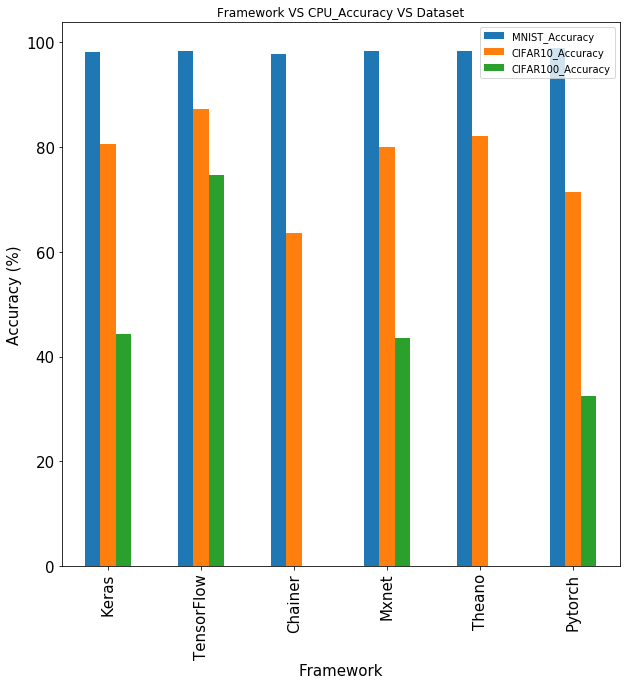

In [87]:
ax = data.plot(kind ='bar',figsize=(10,10) , fontsize = 15)
ax.set_xlabel("Framework",fontsize = 15)
ax.set_ylabel("Accuracy (%)",fontsize = 15)
ax.set_title("Framework VS CPU_Accuracy VS Dataset")
plt.show()


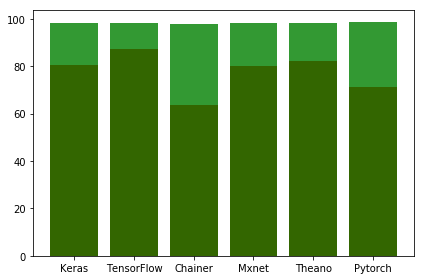

In [254]:
data = pd.read_csv("/home/nesma/Desktop/CPU.csv", delimiter = ",")
data.set_index("DS",drop=True,inplace=True)

data.CIFAR100_Accuracy = data.CIFAR100_Accuracy.astype(float)
data.MNIST_Accuracy= data.MNIST_Accuracy.astype(float)
data.CIFAR100_Accuracy = data.CIFAR100_Accuracy.astype(float)
fig, ax = plt.subplots()

x = list(data.index)
y1= data.CIFAR100_Accuracy
y2= data.CIFAR10_Accuracy
y3= data.MNIST_Accuracy
rec3 = plt.bar(x,y1,color='b',label='1')
rec1 = plt.bar(x,y2,color='red',label='2')
rec2 = plt.bar(x,y3,alpha=opacity,color='g',label='3')
plt.tight_layout()

plt.show()


In [193]:
# pd.to_numeric(mydata.MNIST_Accuracy, errors='coerce')
# mydata.CIFAR10_Accuracy=pd.to_numeric(mydata.CIFAR10_Accuracy)
# mydata.CIFAR100_Accuracy=pd.to_numeric(mydata.CIFAR100_Accuracy)
# mydata.plot(kind ='bar',figsize=(10,10) , fontsize = 15)

# ax2 = dataT.plot(kind ='bar',figsize=(10,10) , fontsize = 15)

# ax2.set_xlabel("Framework",fontsize = 15)
# ax2.set_ylabel("Accuracy (%)",fontsize = 15)
# ax2.set_title("Framework VS CPU_Accuracy VS Dataset")
# plt.show()




In [287]:
mnist = list(data.MNIST_Accuracy)
cifar10 = list(data.CIFAR10_Accuracy )
cifar100 = list(data.CIFAR100_Accuracy) 
raw_data = [mnist,cifar10,cifar100]
df = pd.DataFrame(raw_data)
df = df.transpose()
df.columns = ['MNIST','CIFAR10','CIFAR100']
df


,MNIST,CIFAR10,CIFAR100
0,98.18,80.61,44.22
1,98.30,87.20,74.70
2,97.75,63.67,NaN
3,98.32,79.99,43.61
4,98.35,82.15,NaN
5,98.87,71.35,32.48


In [420]:
# newdata = data.CIFAR100_Accuracy,data.CIFAR10_Accuracy,data.MNIST_Accuracy
# type(newdata)
# newdata = pd.DataFrame(newdata)
# newdata

dataT = data.transpose()
dataT

DS,Keras,TensorFlow,Chainer,Mxnet,Theano,Pytorch
MNIST_Accuracy,98.18,98.3,97.75,98.32,98.35,98.87
MNIST_Time,0:34:07,0:41:11,4:26:42,1:12:58,1:17:17,0:30:42
CIFAR10_Accuracy,80.61,87.2,63.67,79.99,82.15,71.35
CIFAR10_Time,5:49:41,5:36:28,15:09:00,9:16:27,16:27:00,4:53:34
CIFAR100_Accuracy,44.22,74.7,NaN,43.61,NaN,32.48
CIFAR100_Time,16:40:27,24:29:34,NaN,29:07:45,NaN,29:09:57


In [421]:
dataT = dataT.drop('MNIST_Time', axis=0)
dataT = dataT.drop('CIFAR10_Time', axis=0)
dataT = dataT.drop('CIFAR100_Time', axis=0)

dataT

DS,Keras,TensorFlow,Chainer,Mxnet,Theano,Pytorch
MNIST_Accuracy,98.18,98.3,97.75,98.32,98.35,98.87
CIFAR10_Accuracy,80.61,87.2,63.67,79.99,82.15,71.35
CIFAR100_Accuracy,44.22,74.7,NaN,43.61,NaN,32.48


In [422]:
dataT.index[0]

'MNIST_Accuracy'

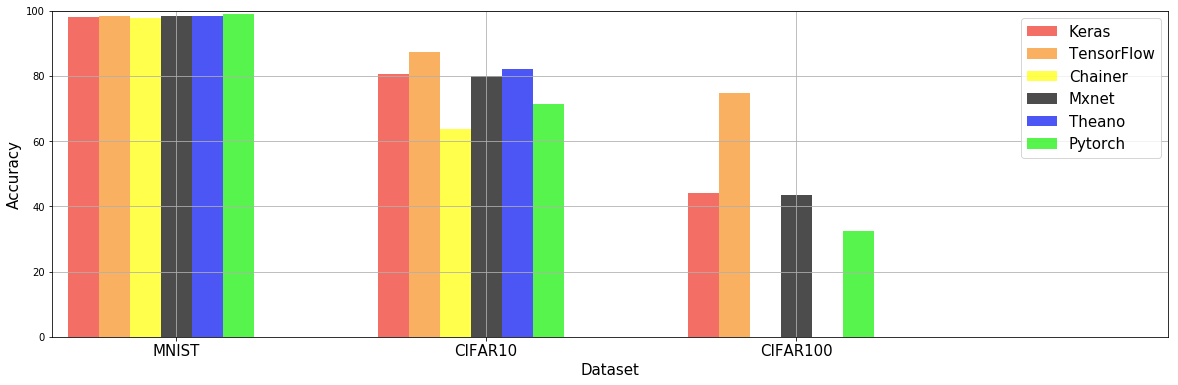

In [462]:
# Setting the positions and width for the bars
pos = list(range(3)) 
width = 0.1
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(20,6))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        dataT['Keras'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.7, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
        label='Keras') 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        dataT['TensorFlow'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.7, 
        # with color
        color='#F78F1E', 
        # with label the second value in first_name
        label=dataT['TensorFlow']) 

# Create a bar with post_score data, 
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using df['post_score'] data,
        dataT['Chainer'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.7, 
        # with color
        color='yellow', 
        # with label the third value in first_name
        label=dataT['Chainer'][0]) 


plt.bar([p + width*3 for p in pos], 
        #using df['post_score'] data,
        dataT['Mxnet'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.7, 
        # with color
        color='#000000', 
        # with label the third value in first_name
        label=dataT['Mxnet'][0]) 


plt.bar([p + width*4 for p in pos], 
        #using df['post_score'] data,
        dataT['Theano'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.7, 
        # with color
        color='#000FF0', 
        # with label the third value in first_name
        label=dataT['Theano'][0]) 

plt.bar([p + width*5 for p in pos], 
        #using df['post_score'] data,
        dataT['Pytorch'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.7, 
        # with color
        color='#0FF000', 
        # with label the third value in first_name
        label=dataT['Pytorch']) 



# Set the y axis label
ax.set_ylabel('Accuracy',fontsize= 15)
ax.set_xlabel('Dataset',fontsize= 15)

# Set the chart's title
# ax.set_title('Framework VS CPU_Accuracy VS Dataset',fontsize=15)

# Set the position of the x ticks
ax.set_xticks([p + 3 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(["MNIST", "CIFAR10","CIFAR100"],fontsize=15)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*15)
plt.ylim([0, 100])

# Adding the legend and showing the plot
plt.legend(['Keras', 'TensorFlow', 'Chainer','Mxnet','Theano','Pytorch'], loc='upper right',fontsize=15)
plt.grid()
plt.show()

In [426]:
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
        'pre_score': [4, 24, 31, 2, 3],
        'mid_score': [25, 94, 57, 62, 70],
        'post_score': [5, 43, 23, 23, 51]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'pre_score', 'mid_score', 'post_score'])
df

,first_name,pre_score,mid_score,post_score
0,Jason,4,25,5
1,Molly,24,94,43
2,Tina,31,57,23
3,Jake,2,62,23
4,Amy,3,70,51


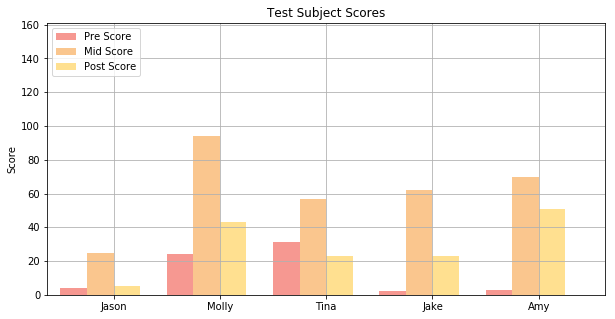

In [431]:
# Setting the positions and width for the bars
pos = list(range(len(df['pre_score']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        df['pre_score'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
        label=df['first_name'][0]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        df['mid_score'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in first_name
        label=df['first_name'][1]) 

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using df['post_score'] data,
        df['post_score'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the third value in first_name
        label=df['first_name'][2]) 

# Set the y axis label
ax.set_ylabel('Score')

# Set the chart's title
ax.set_title('Test Subject Scores')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df['first_name'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df['pre_score'] + df['mid_score'] + df['post_score'])] )

# Adding the legend and showing the plot
plt.legend(['Pre Score', 'Mid Score', 'Post Score'], loc='upper left')
plt.grid()
plt.show()

In [455]:
dataN = data.transpose()
dataN

DS,Keras,TensorFlow,Chainer,Mxnet,Theano,Pytorch
MNIST_Accuracy,98.1800,98.3000,97.7500,98.3200,98.3500,98.8700
MNIST_Time,0.3407,0.4111,4.2642,1.1258,1.1717,0.3042
CIFAR10_Accuracy,80.6100,87.2000,63.6700,79.9900,82.1500,71.3500
CIFAR10_Time,5.4941,5.3628,15.0900,9.1627,16.2700,4.5334
CIFAR100_Accuracy,44.2200,74.7000,NaN,43.6100,NaN,32.4800
CIFAR100_Time,16.4027,24.2934,0.0000,29.0745,0.0000,29.0957


In [456]:
dataN = dataN.drop('MNIST_Accuracy', axis=0)
dataN = dataN.drop('CIFAR10_Accuracy', axis=0)
dataN = dataN.drop('CIFAR100_Accuracy', axis=0)

dataN

DS,Keras,TensorFlow,Chainer,Mxnet,Theano,Pytorch
MNIST_Time,0.3407,0.4111,4.2642,1.1258,1.1717,0.3042
CIFAR10_Time,5.4941,5.3628,15.0900,9.1627,16.2700,4.5334
CIFAR100_Time,16.4027,24.2934,0.0000,29.0745,0.0000,29.0957


In [457]:
dataN

DS,Keras,TensorFlow,Chainer,Mxnet,Theano,Pytorch
MNIST_Time,0.3407,0.4111,4.2642,1.1258,1.1717,0.3042
CIFAR10_Time,5.4941,5.3628,15.0900,9.1627,16.2700,4.5334
CIFAR100_Time,16.4027,24.2934,0.0000,29.0745,0.0000,29.0957


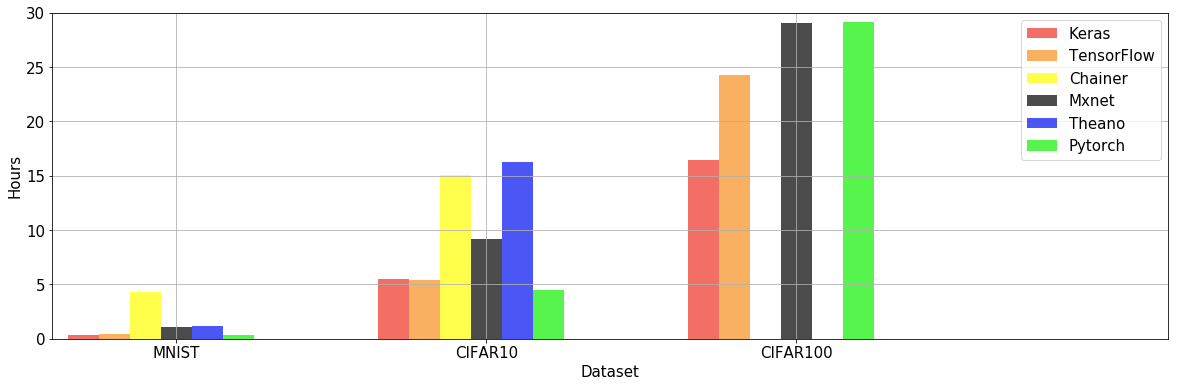

In [481]:
# Setting the positions and width for the bars
pos = list(range(3)) 
width = 0.1
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(20,6))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        dataN['Keras'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.7, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
        label='Keras') 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        dataN['TensorFlow'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.7, 
        # with color
        color='#F78F1E', 
        # with label the second value in first_name
        label=dataN['TensorFlow']) 

# Create a bar with post_score data, 
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using df['post_score'] data,
        dataN['Chainer'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.7, 
        # with color
        color='yellow', 
        # with label the third value in first_name
        label=dataN['Chainer'][0]) 


plt.bar([p + width*3 for p in pos], 
        #using df['post_score'] data,
        dataN['Mxnet'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.7, 
        # with color
        color='#000000', 
        # with label the third value in first_name
        label=dataN['Mxnet'][0]) 


plt.bar([p + width*4 for p in pos], 
        #using df['post_score'] data,
        dataN['Theano'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.7, 
        # with color
        color='#000FF0', 
        # with label the third value in first_name
        label=dataN['Theano'][0]) 

plt.bar([p + width*5 for p in pos], 
        #using df['post_score'] data,
        dataN['Pytorch'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.7, 
        # with color
        color='#0FF000', 
        # with label the third value in first_name
        label=dataN['Pytorch']) 



# Set the y axis label
ax.set_ylabel('Hours',fontsize= 15)
ax.set_xlabel('Dataset',fontsize= 15)

# Set the chart's title
# ax.set_title('Framework VS CPU_Accuracy VS Dataset',fontsize=15)

# Set the position of the x ticks
ax.set_xticks([p + 3 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(["MNIST", "CIFAR10","CIFAR100"],fontsize=15)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*15)
plt.ylim([0, 30])

# Adding the legend and showing the plot
plt.legend(['Keras', 'TensorFlow', 'Chainer','Mxnet','Theano','Pytorch'], loc='upper right',fontsize=15)
plt.rcParams.update({'font.size': 15})

plt.grid()
plt.show()